<a href="https://colab.research.google.com/github/VsepulvedaP2/cliente-servidor/blob/master/Ioters_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

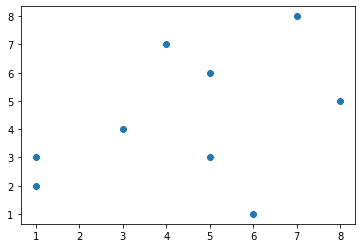

In [ ]:
import matplotlib.pyplot as plt

# List of points
# points = [(1, 2), (1,3), (3, 4), (5,3), (5, 6), (6,1), (7, 8), (9, 10), (6,8)]
points = [[1, 2], [1,3], [3, 4], [5,3], [5, 6], [6,1], [7, 8], [8, 5], [4,7]]


# Unpack the points and plot them
x, y = zip(*points)
plt.scatter(x, y)

# Show the plot
plt.show()

# envelope = points #graham_scan(points)
# print(envelope)

In [ ]:
'''
Convex Hull Demo (SVG) for Graham's Scan.
Firstly use this code to generate SVG frames.
Then transform to bitmaps and convert to GIF.
'''

# range size
N = 300
margin = 50

def saveToSVG(nFrames, points, firmed, trying):
    f = open('demo_'+str(nFrames)+'.svg', 'w')
    f.write("<svg xmlns=\"http://www.w3.org/2000/svg\" version=\"1.1\">\n")
    for p in points:
        f.write("<circle cx=\"" +str(p[0]+margin)+ "\" cy=\""+ str(N-p[1]+margin) +"\" r=\"5\" fill=\"white\" stroke=\"black\"/>\n")
    for i in range(len(firmed)-1):
        f.write("<line x1=\"" +str(firmed[i][0]+margin)+ "\" y1=\""+ str(N-firmed[i][1]+margin) +"\" x2=\"" + str(firmed[i+1][0]+margin) + "\" y2=\"" + str(N-firmed[i+1][1]+margin) + "\" stroke=\"red\" stroke-width=\"5\"/>\n")
    for i in range(len(trying)-1):
        f.write("<line x1=\"" +str(trying[i][0]+margin)+ "\" y1=\""+ str(N-trying[i][1]+margin) +"\" x2=\"" + str(trying[i+1][0]+margin) + "\" y2=\"" + str(N-trying[i+1][1]+margin) + "\" stroke=\"blue\" stroke-width=\"5\"/>\n")
    f.write("</svg>\n")
    f.close()

def generatePoints(n):
    import random as r
    r.seed(100)
    
    res = []
    for i in range(n):
        pt = [r.randint(0,N) for _ in [0, 1]]
        if [pt] not in res:
            res += [pt]
    return res

def norm(x, y):
    return (x*x+y*y)**.5

def dotProductNormed(x1, y1, x2, y2):
    return (x1*x2+y1*y2)/norm(x1, y1)/norm(x2, y2)

def cross(x1, y1, x2, y2):
    return x1*y2 - x2*y1

def graham(n, points):
    if n<3: return
    nframe = 0;
    points.sort(key = lambda x: x[1])
    first = points[0]
    rest = points[1:]
    rest.sort(key = lambda x: -dotProductNormed(x[0]-points[0][0], x[1]-points[0][1], 1, 0))
    points = [first] + rest
    stack = [points[0], points[1]]
    saveToSVG(nframe, points, stack, [stack[-1], points[2]])
    nframe += 1
    i=2
    while i<n:
        x0, y0 = stack[-2][0], stack[-2][1]
        x1, y1 = stack[-1][0], stack[-1][1]
        x2, y2 = points[i][0], points[i][1]
        if cross(x1-x0, y1-y0, x2-x0, y2-y0)<0:
            stack.pop()
        else:
            stack += [points[i]]
            i+=1
        if i<n:
            saveToSVG(nframe, points, stack, [stack[-1], points[i]])
        else:
            saveToSVG(nframe, points, stack+[points[0]], [])
        nframe += 1
    return stack

# test 30 points temporarily
n = 9
# pts = generatePoints(n)


pts = [[1, 2], [1,3], [3, 4], [5,3], [5, 6], [6,1], [7, 8], [8, 5], [4,7]]

graham(n, pts)

[[6, 1], [8, 5], [7, 8], [4, 7], [1, 3], [1, 2]]

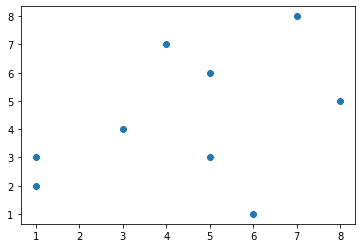

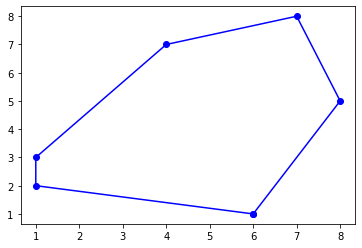


El Área del Polígono es: 30.5


In [ ]:
import matplotlib.pyplot as plt

points = [[1, 2], [1,3], [3, 4], [5,3], [5, 6], [6,1], [7, 8], [8, 5], [4,7]]


# Unpack the points and plot them
x, y = zip(*points)
plt.scatter(x, y)

# Show the plot
plt.show()




# Imprime la Envolvente Convexa
# Antes de imprimir las coordenadas agrega al final la primera coordenada
# para que gráficamente se cierre el perímetro y para que al calcular
# el área del polígono Irregular cumpla con los requisitos del algoritmo
# aunque no es necesario ya que la función área lo hace si no se agrega antes

points = [[6, 1], [8, 5], [7, 8], [4, 7], [1, 3], [1, 2], [6, 1]]


# Plot the points
x, y = zip(*points)
plt.plot(x, y, 'bo-')

# Show the plot
plt.show()


# Calcula el área de un Polígono Irregular
# Condición es Polígono Irregular cerrado y eje no se intersectan entre si

from shapely.geometry import Polygon

# Create a polygon object
polygon = Polygon(points)

# Calculate the area of the polygon
area = polygon.area

print()
print("El Área del Polígono es:", area)